In [1]:
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns
import os
import numpy as np
%load_ext autoreload
%autoreload 2

# Load data

In [26]:
df_list = []
for f in os.listdir("./output_test"):
    df = pd.read_csv("output_test/" + f)
    df['ds'] = os.path.splitext(f)[0]
    df_list.append(df)
df = pd.concat(df_list)
df

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,base_distribution,data_path,...,x_dropout,x_layers,x_units,y_base_units,y_dropout,y_layers,y_top_units,train_logLik,val_logLik,ds
0,2023-05-12 02:45:48,1.5min,4da10336a8d845d08f4cd52ac0877b06,serious-chimp-144,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,100,50,0.1,5,20,0.715184,1.021823,runs
1,2023-05-12 02:44:35,1.2min,80a25015557c424a9ac7a768e533a2a9,crawling-gull-423,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,100,50,0.1,5,20,-4.544346,-13.348383,runs
2,2023-05-12 02:44:15,19.2s,d096b8e7105f4e9f9f7e4289f0aa6b9b,sedate-lark-826,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,100,50,0.1,5,20,0.023744,-5.631327,runs
3,2023-05-12 02:41:51,2.4min,58b97191523543759ace9d2ea818e345,caring-lamb-601,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,100,50,0.1,5,10,-0.535738,-4.832777,runs
4,2023-05-12 02:40:56,54.8s,5d66bb1ba2ba4e69a699e92f830fb750,bright-steed-356,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,100,50,0.1,5,10,-3.486928,-9.081163,runs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-05-12 01:41:12,1.4min,4aa47cf2fa3e43dd9c39f1177c8f3fc2,thoughtful-yak-58,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,1,50,50,0.1,2,10,0.614742,-9.560602,runs
196,2023-05-12 01:40:46,39.8s,3b426fab32f24fcab15c8f70f2aa5448,grandiose-conch-652,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,50,20,0.1,2,10,-1.463134,-7.074945,runs
197,2023-05-12 01:40:43,30.8s,edcd8c6a7add46b28fab6d48ced5f56a,nosy-horse-950,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,1,20,20,0.1,10,20,9.268124,25.329124,runs
198,2023-05-12 01:40:42,43.0s,a93179351a384e25899f32146f8d8f00,stately-stag-615,LOCAL,hp.py,daniel,FINISHED,"tfp.distributions.Normal(""Normal"", batch_shape...",airfoil,...,0.1,2,100,20,0.1,2,20,0.297879,-6.598986,runs


In [32]:
df.columns

Index(['Run ID', 'ds', 'model_type', 'y_base_units', 'y_top_units',
       'x_dropout', 'learning_rate', 'x_layers', 'x_units', 'seed',
       'y_dropout', 'y_layers', 'val_logLik', 'train_logLik'],
      dtype='object')

In [37]:
all_params = ['model_type',
       'y_base_units', 'y_top_units', 'x_dropout',
       'learning_rate', 'x_layers', 'x_units', 'seed',
       'y_dropout', 'y_layers']
relevant_params = ['y_base_units', 'y_top_units', 'x_dropout',
       'learning_rate', 'x_layers', 'x_units', 'y_layers',
       'y_dropout']
df = df[["Run ID", 'ds'] +  all_params +["val_logLik", "train_logLik"]]
df_ls = df[df['model_type'] == "ModelType.LS"]

In [5]:
all_params = ['params.model_type',
       'params.y_base_units', 'params.y_top_units', 'params.x_dropout',
       'params.learning_rate', 'params.x_layers', 'params.x_units', 'params.seed',
       'params.y_dropout']
relevant_params = ['params.y_base_units', 'params.y_top_units', 'params.x_dropout',
       'params.learning_rate', 'params.x_layers', 'params.x_units',
       'params.y_dropout']
df = df[["experiment_id", 'ds'] +  all_params +["metrics.val_logLik", "metrics.train_logLik"]]
df_ls = df[df['params.model_type'] == "ModelType.LS"]

In [6]:
df.groupby(['Run ID'] + all_params).describe()

val_logLik   
                                                                                                                                    count   
Run ID                           model_type   y_base_units y_top_units x_dropout learning_rate x_layers x_units seed y_dropout              
014f286f8b894b3ba72231149635e224 ModelType.LS 20           10          0.1       0.0001        2        50      3    0.1              1.0  \
01a7ced5caee4018a606991e5f7ec2b8 ModelType.LS 50           20          0.1       0.0001        2        100     3    0.1              1.0   
01a7f0a7159d43db9fbbd90b71c6ad8a ModelType.LS 100          10          0.1       0.0100        2        50      3    0.1              1.0   
06fefe78519e40679bada28a91af1c69 ModelType.LS 20           5           0.1       0.0001        2        50      3    0.1              1.0   
08bb4370d74545e0b033d02db030412a ModelType.LS 20           20          0.1       0.0001        2        100     3    0.1              1.0   
...                                                                                                                                   ...   
f85abac61d6c4326b303b9fc05e0a180 ModelType.LS 20           5           0.1       0.0010        1        100     3    0.1              1.0   
f86f7e86454e4e90b8f18cad2e5e344b ModelType.LS 100          10          0.1       0.0100        2        100     3    0.1              1.0   
fc370594fb194c278aa8b7832fd9c129 ModelType.LS 100          5           0.1       0.0001        2        50      3    0.1              1.0   
fc9b179486a84b07ac4d26344412d265 ModelType.LS 50           10          0.1       0.0100        1        100     3    0.1              1.0   
ff36ca5e20964570b630d13d5c9c988a ModelType.LS 50           5           0.1       0.0001        1        50      3    0.1              1.0   

                                                                                                                                            
                                                                                                                                     mean   
Run ID                           model_type   y_base_units y_top_units x_dropout learning_rate x_layers x_units seed y_dropout              
014f286f8b894b3ba72231149635e224 ModelType.LS 20           10          0.1       0.0001        2        50      3    0.1         0.623170  \
01a7ced5caee4018a606991e5f7ec2b8 ModelType.LS 50           20          0.1       0.0001        2        100     3    0.1        -3.621768   
01a7f0a7159d43db9fbbd90b71c6ad8a ModelType.LS 100          10          0.1       0.0100        2        50      3    0.1        -4.386549   
06fefe78519e40679bada28a91af1c69 ModelType.LS 20           5           0.1       0.0001        2        50      3    0.1         1.439602   
08bb4370d74545e0b033d02db030412a ModelType.LS 20           20          0.1       0.0001        2        100     3    0.1        -3.383185   
...                                                                                                                                   ...   
f85abac61d6c4326b303b9fc05e0a180 ModelType.LS 20           5           0.1       0.0010        1        100     3    0.1         2.953203   
f86f7e86454e4e90b8f18cad2e5e344b ModelType.LS 100          10          0.1       0.0100        2        100     3    0.1        -1.312827   
fc370594fb194c278aa8b7832fd9c129 ModelType.LS 100          5           0.1       0.0001        2        50      3    0.1         2.824308   
fc9b179486a84b07ac4d26344412d265 ModelType.LS 50           10          0.1       0.0100        1        100     3    0.1        -2.382398   
ff36ca5e20964570b630d13d5c9c988a ModelType.LS 50           5           0.1       0.0001        1        50      3    0.1        26.891094   

                                                                                                                                     
                                           

<Axes: xlabel='ds', ylabel='metrics.val_logLik'>

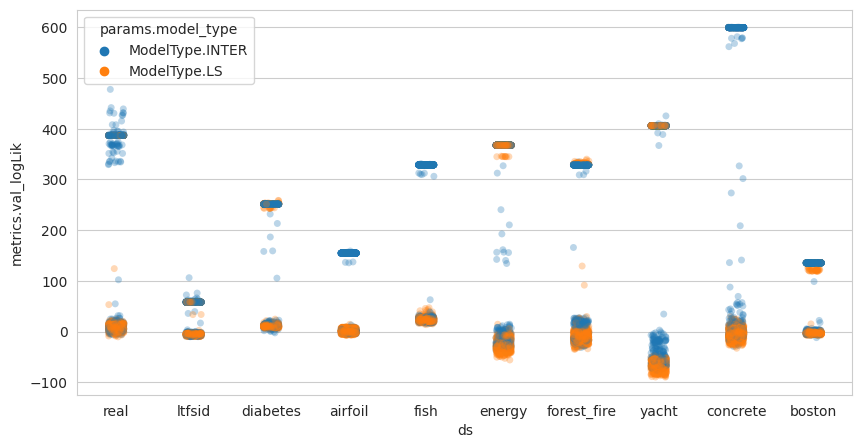

In [6]:
plt.figure(figsize=(10,5))
sns.stripplot(df, x='ds', y="metrics.val_logLik", hue='params.model_type', alpha=0.3)

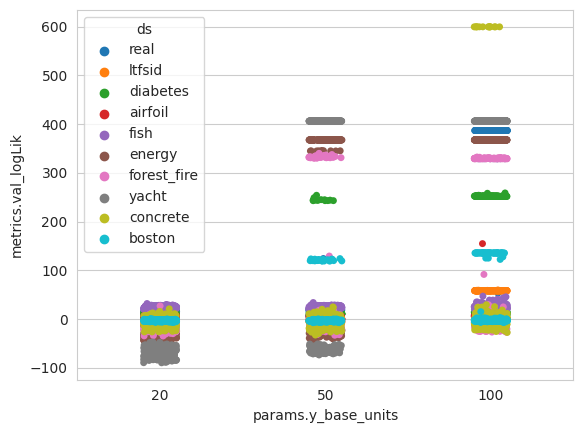

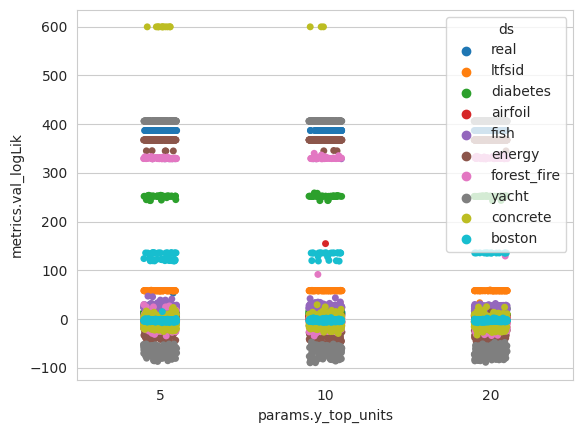

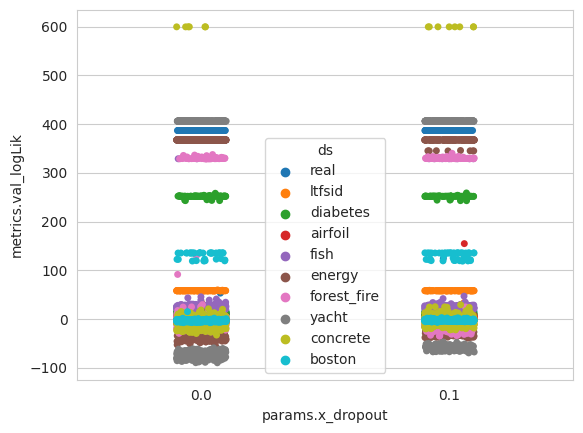

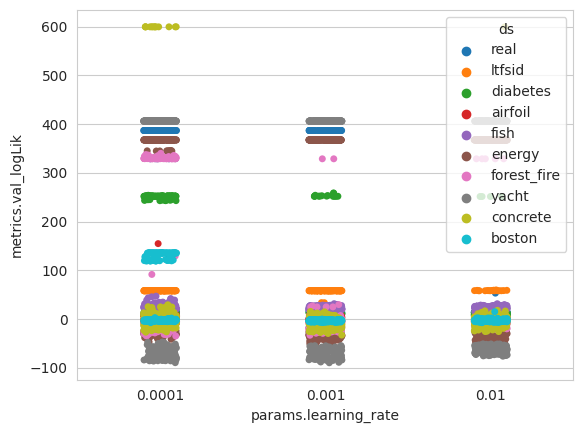

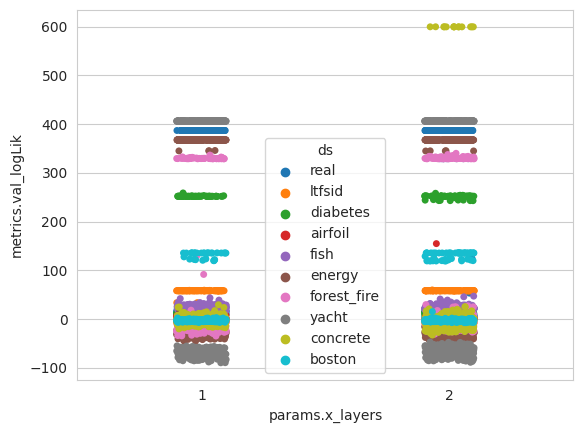

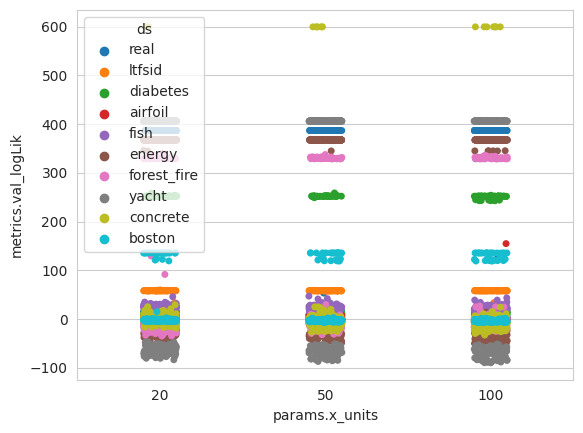

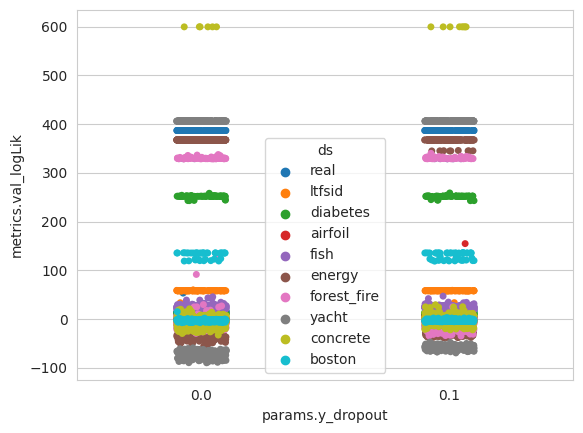

In [220]:
from sklearn.linear_model import LinearRegression
df_ls = df[df['params.model_type'] == "ModelType.LS"]
for param in relevant_params:
    plt.figure()
    sns.stripplot(df_ls, x=param, y="metrics.val_logLik", hue='ds')
# sns.stripplot(df, x='ds', y="metrics.val_logLik", hue='params.learning_rate')

In [23]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.pivot_table(index=relevant_params, columns="ds", values=['metrics.val_logLik', 'metrics.train_logLik'], aggfunc=np.mean)

metrics.train_logLik   
ds                                                                                                                                        airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout                        
20                  5                  0.0              0.0001               1               20             0.0                         23.455763  \
                                                                                             50             0.0                         25.111764   
                                                                                             100            0.0                         25.477031   
                                                                             2               20             0.0                         24.403315   
                                                                                             50             0.0                         -0.837734   
...                                                                                                                                           ...   
100                 20                 0.1              0.0100               1               50             0.1                         -2.882142   
                                                                                             100            0.1                         -7.489086   
                                                                             2               20             0.1                         -1.972801   
                                                                                             50             0.1                         -5.575174   
                                                                                             100            0.1                         -4.552819   

                                                                                                                                         
ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               5.485198  \
                                                                                             50             0.0               3.749458   
                                                                                             100            0.0               1.003857   
                                                                             2               20             0.0               4.635391   
                                                                                             50             0.0               5.437844   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               0.290684   
                                                                                             100            0.1              -0.087758   
                                                                             2               20             0.1              -0.672554   
                                                                                             50             0.1               1.044283   
                                                                                             100            0.1              -1.915361   

                                                                                                         

In [46]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Clustermap

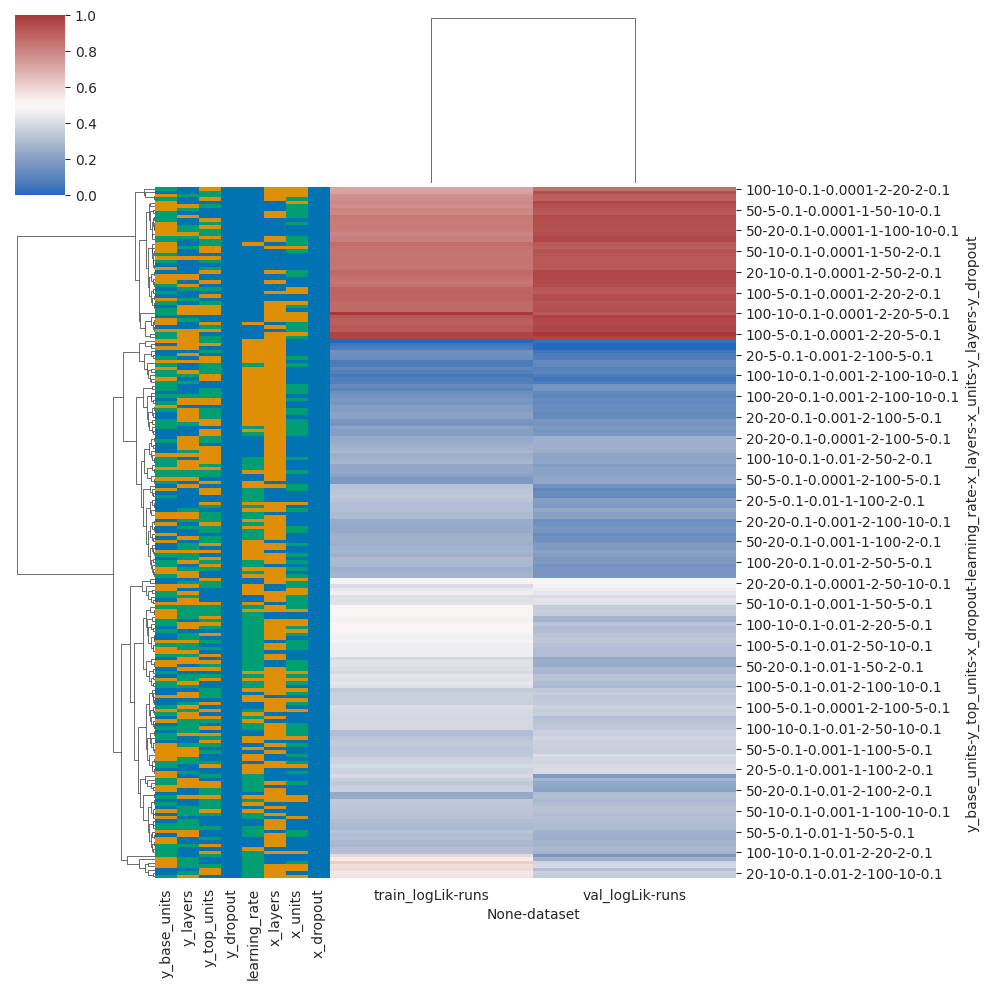

In [38]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['model_type', 'Run ID'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values=['train_logLik', 'val_logLik'], aggfunc=np.mean)

def get_color_map(color_param, df):
    param = df.reset_index(f'{color_param}')[f'{color_param}'].to_numpy()
    param = pd.Series(param, name=color_param)
    param.index = df.index
    lut = dict(zip(param.unique(), sns.color_palette('colorblind')))
    return param.map(lut)

row_colors = [get_color_map(p, df_ls_) for p in ['y_base_units','y_layers', 'y_top_units', 'y_dropout',
       'learning_rate', 'x_layers', 'x_units', 'x_dropout']]
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=pd.DataFrame(row_colors).T)

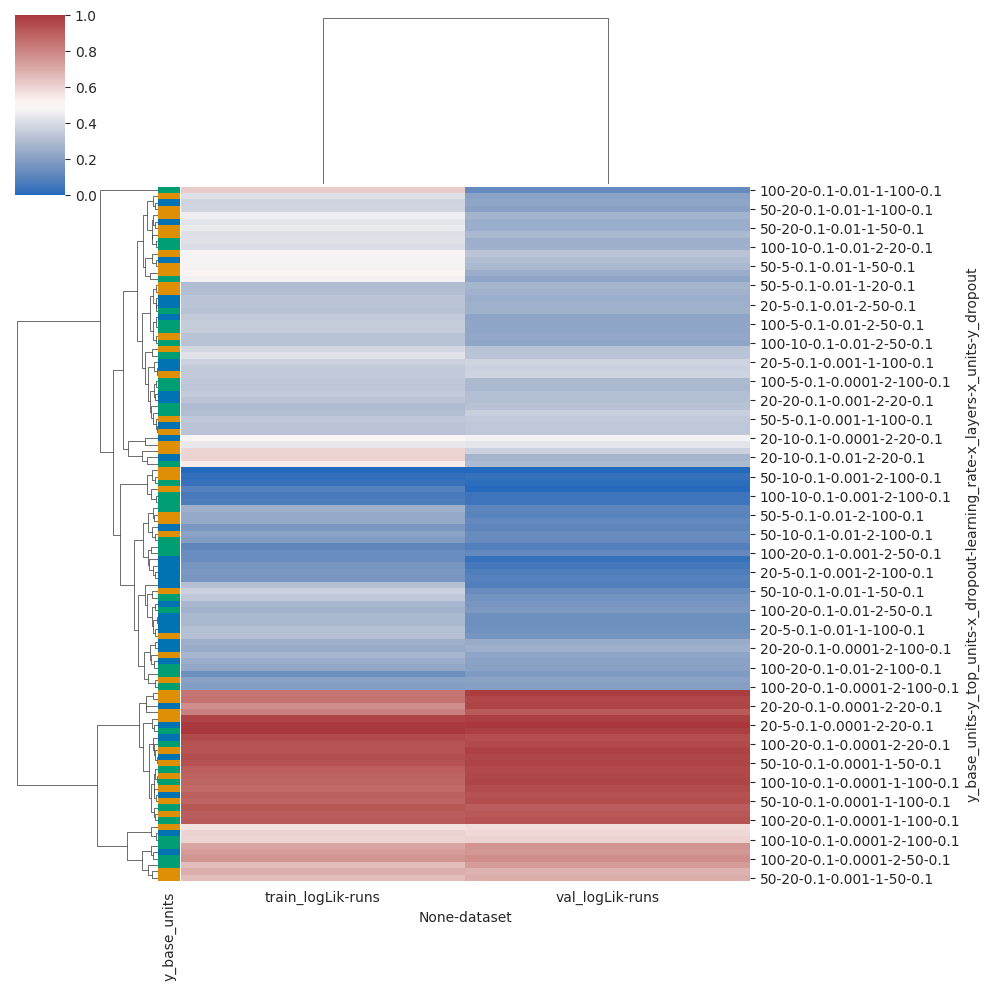

In [16]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['model_type', 'Run ID'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values=['val_logLik', 'train_logLik'], aggfunc=np.mean)
y_base_units = df_ls_.reset_index('y_base_units')['y_base_units'].to_numpy()
y_base_units = pd.Series(y_base_units, name='y_base_units')
y_base_units.index = df_ls_.index
color = [sns.color_palette()[2], sns.color_palette()[0], sns.color_palette()[3]]
lut = dict(zip(y_base_units.unique(), sns.color_palette('colorblind')))
row_color = y_base_units.map(lut)
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=row_color)

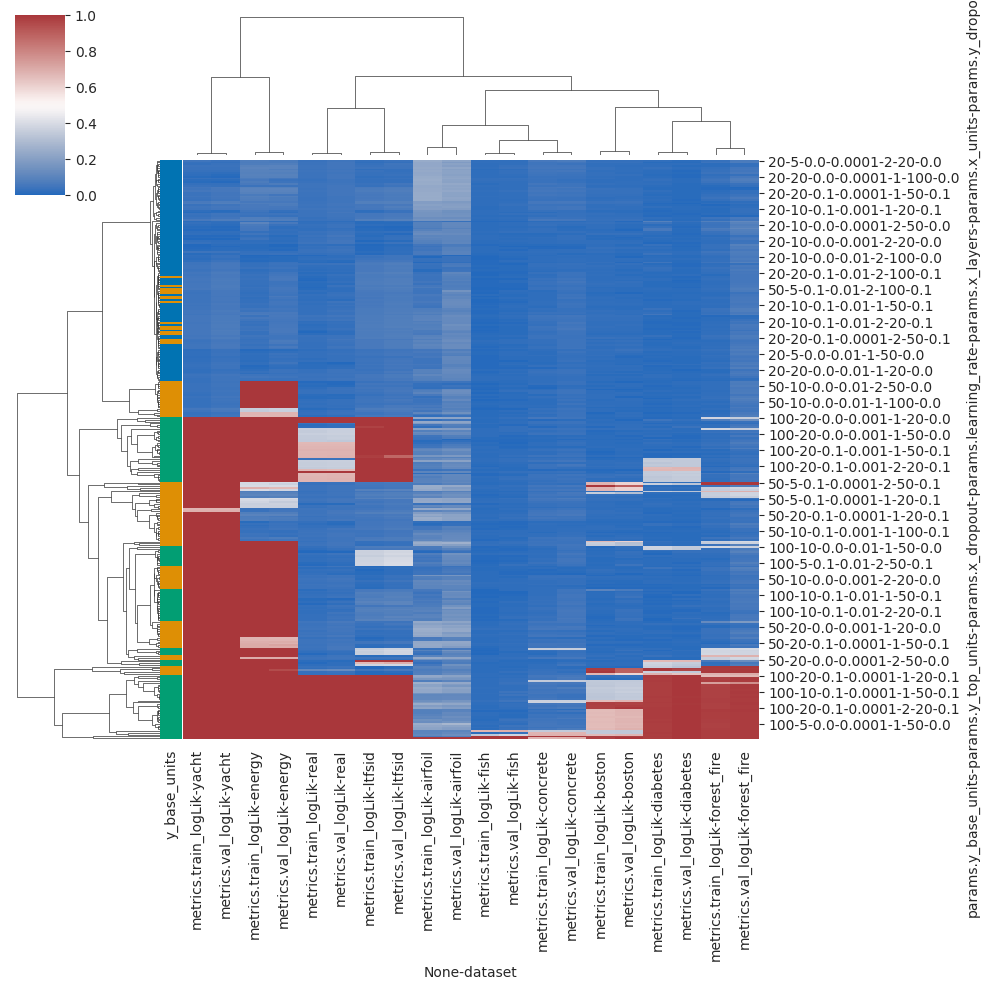

In [7]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values=['metrics.val_logLik', 'metrics.train_logLik'], aggfunc=np.mean)
y_base_units = df_ls_.reset_index('params.y_base_units')['params.y_base_units'].to_numpy()
y_base_units = pd.Series(y_base_units, name='y_base_units')
y_base_units.index = df_ls_.index
color = [sns.color_palette()[2], sns.color_palette()[0], sns.color_palette()[3]]
lut = dict(zip(y_base_units.unique(), sns.color_palette('colorblind')))
row_color = y_base_units.map(lut)
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=row_color)

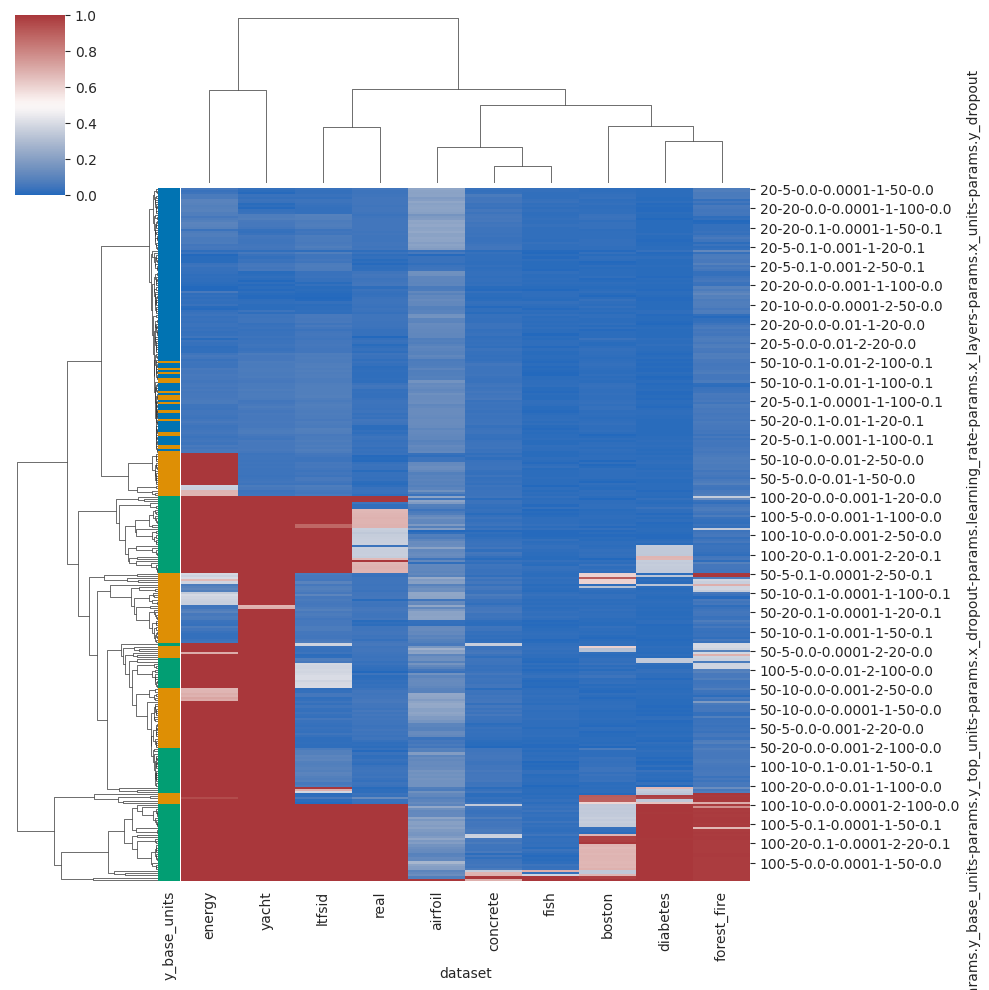

In [47]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values=['metrics.val_logLik', 'metrics.train_logLik'], aggfunc=np.mean)
y_base_units = df_ls_.reset_index('params.y_base_units')['params.y_base_units'].to_numpy()
y_base_units = pd.Series(y_base_units, name='y_base_units')
y_base_units.index = df_ls_.index
color = [sns.color_palette()[2], sns.color_palette()[0], sns.color_palette()[3]]
lut = dict(zip(y_base_units.unique(), sns.color_palette('colorblind')))
row_color = y_base_units.map(lut)
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=row_color)

## color all parameters

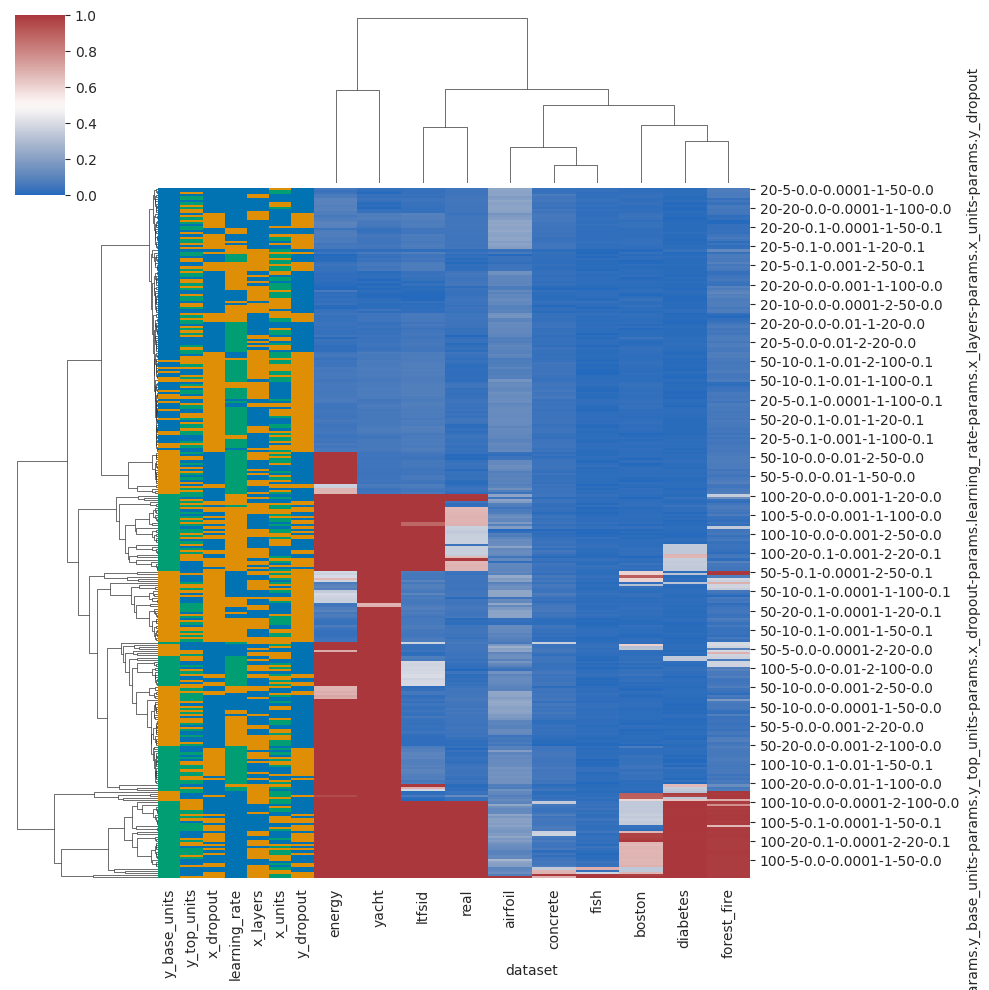

In [63]:
color_param = 'y_top_units'
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values='metrics.val_logLik', aggfunc=np.mean)

def get_color_map(color_param):
    color_param = color_param.split('params.')[1]
    param = df_ls_.reset_index(f'params.{color_param}')[f'params.{color_param}'].to_numpy()
    param = pd.Series(param, name=color_param)
    param.index = df_ls_.index
    lut = dict(zip(param.unique(), sns.color_palette('colorblind')))
    return param.map(lut)
row_colors = [get_color_map(p) for p in relevant_params]
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=pd.DataFrame(row_colors).T)

## color only relevant parameters

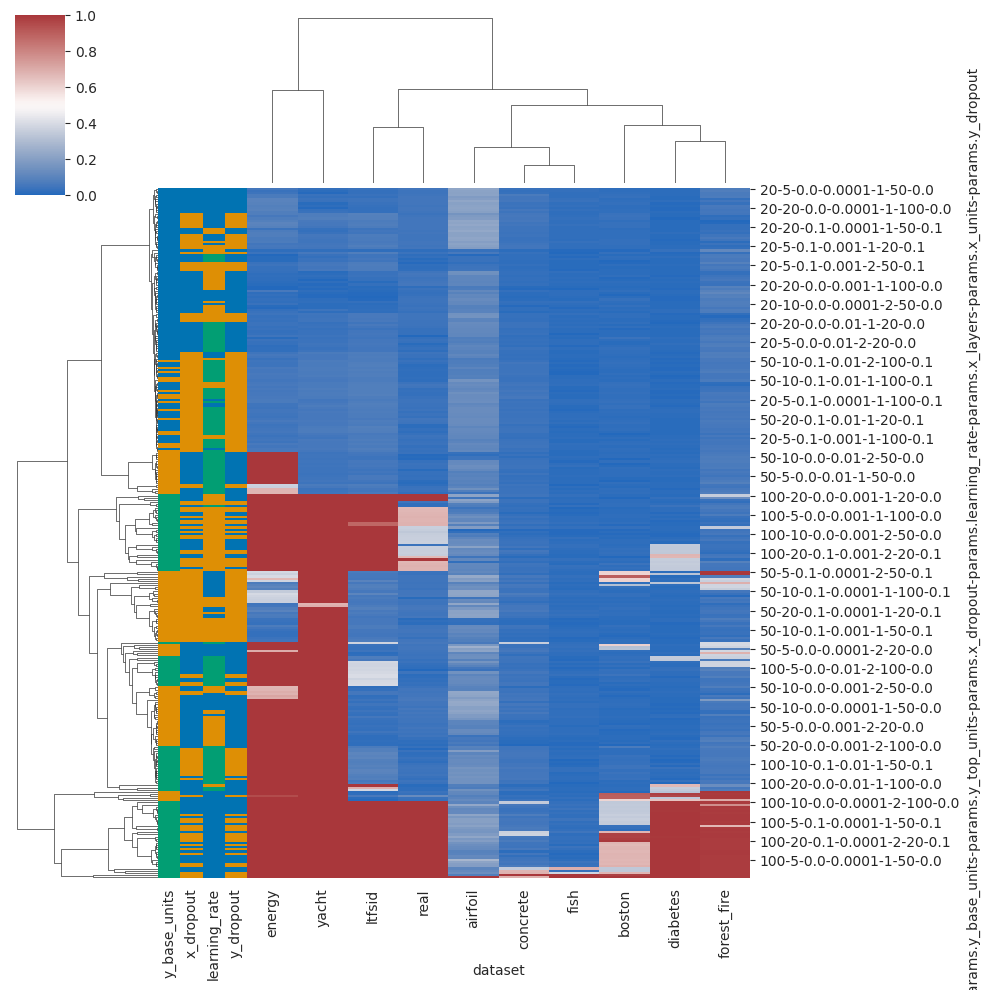

In [16]:
color_param = 'y_top_units'
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values='metrics.val_logLik', aggfunc=np.mean)

def get_color_map(color_param):
    color_param = color_param.split('params.')[1]
    param = df_ls_.reset_index(f'params.{color_param}')[f'params.{color_param}'].to_numpy()
    param = pd.Series(param, name=color_param)
    param.index = df_ls_.index
    lut = dict(zip(param.unique(), sns.color_palette('colorblind')))
    return param.map(lut)
row_colors = [get_color_map(p) for p in ['params.y_base_units', 'params.x_dropout',
       'params.learning_rate', 'params.y_dropout']]
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=pd.DataFrame(row_colors).T)

# drash

In [174]:
from sklearn.linear_model import LinearRegression
y = df_ls['metrics.val_logLik'].to_numpy()[:,None]
print(y.shape)
for p in relevant_params:
    print(p)
    X = df_ls[p].to_numpy()[:,None]
    y = df_ls['metrics.val_logLik']
    print(X.shape)
    print(X.shape)
    model = LinearRegression()
    model.fit(X,y)
    print(model.coef_)

(9720, 1)
params.y_base_units
(9720, 1)
(9720, 1)
[1.71987022]
params.y_top_units
(9720, 1)
(9720, 1)
[-0.56181765]
params.x_dropout
(9720, 1)
(9720, 1)
[-99.0386122]
params.learning_rate
(9720, 1)
(9720, 1)
[-4782.36900768]
params.x_layers
(9720, 1)
(9720, 1)
[3.9877005]
params.x_units
(9720, 1)
(9720, 1)
[0.04295031]
params.y_dropout
(9720, 1)
(9720, 1)
[-99.0386122]


In [185]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [202]:
for dataset, df_ds in df_ls.drop(columns=['params.model_type', 'experiment_id']).groupby('ds'):
    test = df_ds.drop(columns='ds')
    # print(df_ds)
    break
tes

,params.y_base_units,params.y_top_units,params.x_dropout,params.learning_rate,params.x_layers,params.x_units,params.seed,params.y_dropout,metrics.val_logLik
1,20,10,0.1,0.0001,1,100,2,0.1,6.330238
4,20,10,0.1,0.0010,1,100,2,0.1,-0.777696
6,20,10,0.1,0.0100,1,100,2,0.1,2.193360
7,100,20,0.1,0.0001,2,50,1,0.1,1.868301
11,20,10,0.1,0.0001,1,50,3,0.1,6.970502
...,...,...,...,...,...,...,...,...,...
1939,50,10,0.0,0.0100,1,100,1,0.0,-1.126688
1940,50,5,0.0,0.0100,2,50,1,0.0,-1.452015
1941,20,20,0.0,0.0100,1,50,1,0.0,1.930776
1942,20,10,0.0,0.0100,2,20,1,0.0,0.723718


In [ ]:
corrwith(test['metrics.val_logLik'])

In [209]:
test['metrics.val_logLik']

1       6.330238
4      -0.777696
6       2.193360
7       1.868301
11      6.970502
          ...   
1939   -1.126688
1940   -1.452015
1941    1.930776
1942    0.723718
1943    0.662427
Name: metrics.val_logLik, Length: 972, dtype: float64

In [211]:
test[relevant_params].corrwith(test['metrics.val_logLik'], method='spearman')

params.y_base_units     0.025870
params.y_top_units      0.020931
params.x_dropout        0.068909
params.learning_rate   -0.404190
params.x_layers        -0.510487
params.x_units         -0.426000
params.y_dropout        0.068909
dtype: float64

In [207]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [215]:
sns.swarmplot(df, x='params.y_base_units', y='metrics.val_logLik', hue='ds')


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fdbcf288700> (for post_execute):


KeyboardInterrupt: 

# Rerun exp

In [2]:
from hp import *
from utils import *
get_hp_space()[0]

2023-05-10 14:44:34.825017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 14:44:34.857089: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 14:44:34.857629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 14:44:35.376567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 14:44:36.015622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

{'seed': 1,
 'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0},
 'net_y_size_trunk_args': {'y_base_units': 20, 'y_top_units': 5, 'dropout': 0},
 'optimizer': <keras.optimizers.legacy.adam.Adam at 0x7f0f1e63e9b0>,
 'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>,
 'model_type': <ModelType.LS: 'ls'>}

In [18]:
data_path = "energy"

log_file: str = "train.log"
log_level: str = "info"
setup_logger(log_file, log_level)

logging.info(f"TFP Version {tfp.__version__}")
logging.info(f"TF  Version {tf.__version__}")

setup_folders(data_path)

hp_space = {
            "seed": 1,
            "net_x_arch_trunk_args": {
                "x_units": 20,
                "x_layers": 1,
                "dropout": 0,
            },
            "net_y_size_trunk_args": {
                "y_base_units": 100,
                "y_top_units": 5,
                "dropout": 0.0,
            },
            "optimizer": Adam(learning_rate=1e-3),
            "base_distribution": tfd.Normal(loc=0, scale=1),
            "model_type": ModelType.LS,
        }
print(hp_space)
logging.info(f"Size of search space: {len(hp_space)}")

mlflow.autolog()
experiment_id = mlflow.set_experiment(f"{data_path}_runs")


frame = inspect.currentframe()
args, _, _, values = inspect.getargvalues(frame)
arg_vals = {arg: values[arg] for arg in args}

fit_args = (hp_space, data_path, experiment_id.experiment_id, arg_vals, False)
fit_args

INFO:root:TFP Version 0.19.0
INFO:root:TF  Version 2.12.0
{'seed': 1, 'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0}, 'net_y_size_trunk_args': {'y_base_units': 100, 'y_top_units': 5, 'dropout': 0.0}, 'optimizer': <keras.optimizers.legacy.adam.Adam object at 0x7f0e6421b6d0>, 'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>, 'model_type': <ModelType.LS: 'ls'>}
INFO:root:Size of search space: 6


2023/05/10 14:58:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/05/10 14:58:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/10 14:58:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023/05/10 14:58:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


({'seed': 1,
  'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0},
  'net_y_size_trunk_args': {'y_base_units': 100,
   'y_top_units': 5,
   'dropout': 0.0},
  'optimizer': <keras.optimizers.legacy.adam.Adam at 0x7f0e6421b6d0>,
  'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>,
  'model_type': <ModelType.LS: 'ls'>},
 'energy',
 '921567085744556525',
 {},
 False)

In [19]:
def fit_func(params, data_path, experiment_id, args, fast):

    data = load_data(data_path)
    train_data = (data["x_train"], data["y_train"])
    val_data = (data["x_test"], data["y_test"])

    mlflow.start_run(experiment_id=experiment_id)

    log_fit_params(args, params)

    model_type = params["model_type"]
    model_kwargs = get_model_kwargs(model_type)
    params = {**params, **model_kwargs}

    x_args = params.pop("net_x_arch_trunk_args")
    params["net_x_arch_trunk"] = relu_network(
        [x_args["x_units"]] * x_args["x_layers"], dropout=x_args["dropout"]
    )
    y_args = params.pop("net_y_size_trunk_args")
    params["net_y_size_trunk"] = nonneg_tanh_network(
        (y_args["y_base_units"], y_args["y_base_units"], y_args["y_top_units"]),
        dropout=y_args["dropout"],
    )

    seed = params.pop("seed")
    set_seeds(seed)

    hist, neat_model = fit(
        epochs=20 if fast else 10_000,
        # epochs=20,
        train_data=train_data,
        val_data=val_data,
        **params,
    )

    mlflow.log_metric("val_logLik", neat_model.evaluate(x=train_data, y=train_data[1]))
    mlflow.log_metric("train_logLik", neat_model.evaluate(x=val_data, y=val_data[1]))

    mlflow.end_run()
    return neat_model, hist

In [20]:
neat_model, hist = fit_func(*fit_args)

INFO:root:setting random seed to 1
Epoch 1/10000
22/22 [==============================] - 1s 8ms/step - logLik: 455.3990 - val_logLik: 110.7015
Epoch 2/10000
22/22 [==============================] - 0s 2ms/step - logLik: 212.2634 - val_logLik: 50.6591
Epoch 3/10000
22/22 [==============================] - 0s 2ms/step - logLik: 94.1016 - val_logLik: 29.9826
Epoch 4/10000
22/22 [==============================] - 0s 2ms/step - logLik: 58.2502 - val_logLik: 19.7449
Epoch 5/10000
22/22 [==============================] - 0s 2ms/step - logLik: 46.1947 - val_logLik: 17.1252
Epoch 6/10000
22/22 [==============================] - 0s 2ms/step - logLik: 41.1811 - val_logLik: 15.5622
Epoch 7/10000
22/22 [==============================] - 0s 2ms/step - logLik: 37.8692 - val_logLik: 14.1020
Epoch 8/10000
22/22 [==============================] - 0s 2ms/step - logLik: 34.6190 - val_logLik: 12.8984
Epoch 9/10000
22/22 [==============================] - 0s 2ms/step - logLik: 31.5040 - val_logLik: 11.5524

2023/05/10 14:59:26 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/05/10 14:59:26 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmppzc8cmbw/model/data/model/assets
INFO:tensorflow:Assets written to: /tmp/tmppzc8cmbw/model/data/model/assets


2023/05/10 14:59:29 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmppzc8cmbw/model, flavor: tensorflow), fall back to return ['tensorflow==2.12.0']. Set logging level to DEBUG to see the full traceback.


INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data/model
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data/model/variables
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data/model/assets
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/tensorboard_logs/train
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/tensorboard_logs/validation
3/3 [==============================] - 0s 1ms/step - logLik: -31.1599


In [16]:
params = fit_args[0]
model_type = params["model_type"]
model_kwargs = get_model_kwargs(model_type)
params = {**params, **model_kwargs}

x_args = params.pop("net_x_arch_trunk_args")
params["net_x_arch_trunk"] = relu_network(
    [x_args["x_units"]] * x_args["x_layers"], dropout=x_args["dropout"]
)
y_args = params.pop("net_y_size_trunk_args")
params["net_y_size_trunk"] = nonneg_tanh_network(
    (y_args["y_base_units"], y_args["y_base_units"], y_args["y_top_units"]),
    dropout=y_args["dropout"],
)

seed = params.pop("seed")
set_seeds(seed)
data = load_data(data_path)
train_data = (data["x_train"], data["y_train"])
neat_model = get_neat_model(dim_features=train_data[0].shape[1], **params)
neat_model

INFO:root:setting random seed to 1


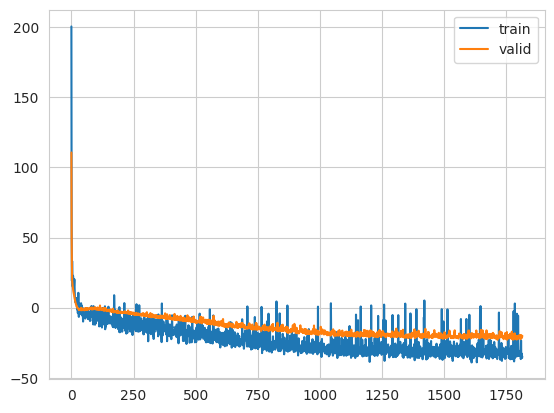

In [21]:
plt.plot(hist.history['logLik'], label='train')
plt.plot(hist.history['val_logLik'], label='valid')
plt.legend()

In [7]:
neat_model

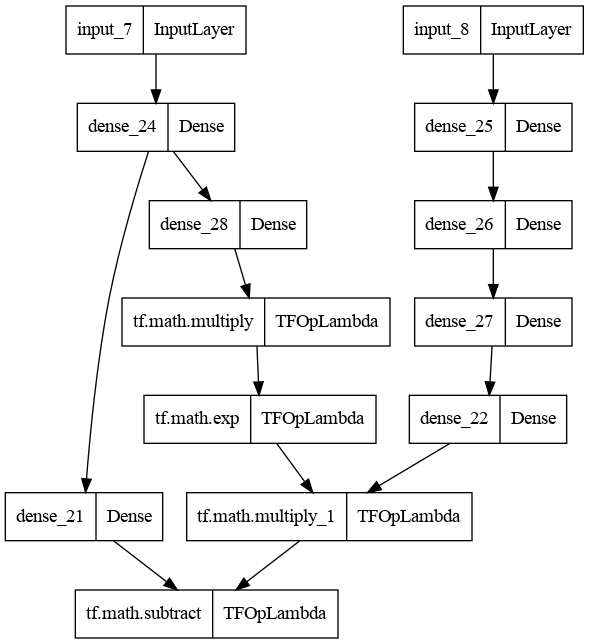

In [17]:
tf.keras.utils.plot_model(neat_model)

4/4 [==============================] - 0s 978us/step


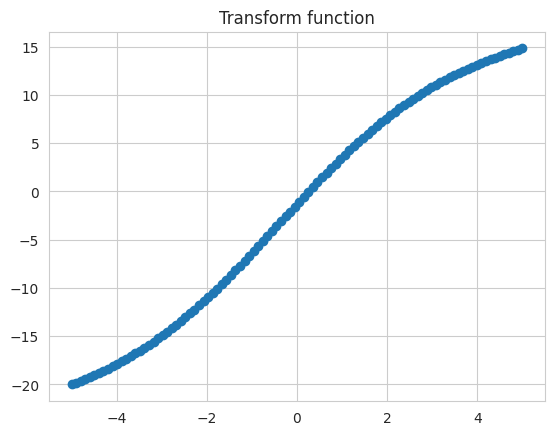

In [22]:
yy = np.linspace(-5,5,100)
xx = np.zeros((yy.shape[0], 8))
z = neat_model.predict((xx,yy))
plt.title("Transform function")
plt.scatter(yy, z)

22/22 [==============================] - 0s 749us/step


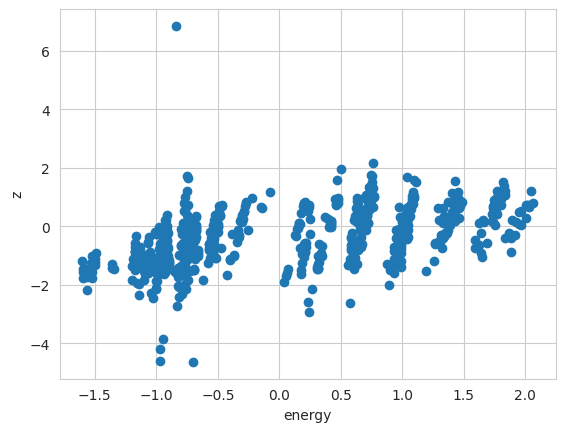

In [23]:
yy = load_data(data_path)['y_train']
xx = load_data(data_path)['x_train']
z = neat_model.predict((xx,yy))
plt.ylabel('z')
plt.xlabel('energy')
plt.scatter(yy, z)

(array([  3.,   1.,   0.,   1.,   6.,  14.,  75., 127., 109., 104., 108.,
         88.,  39.,  13.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([-4.63332224, -4.17390919, -3.71449614, -3.25508308, -2.79567003,
        -2.33625698, -1.87684393, -1.41743088, -0.95801783, -0.49860477,
        -0.03919172,  0.42022133,  0.87963438,  1.33904743,  1.79846048,
         2.25787354,  2.71728659,  3.17669964,  3.63611269,  4.09552574,
         4.55493879,  5.01435184,  5.4737649 ,  5.93317795,  6.392591  ,
         6.85200405]),
 <BarContainer object of 25 artists>)

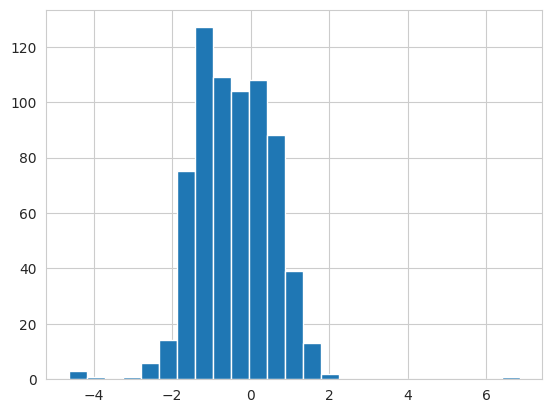

In [24]:
plt.hist(z, bins=25)

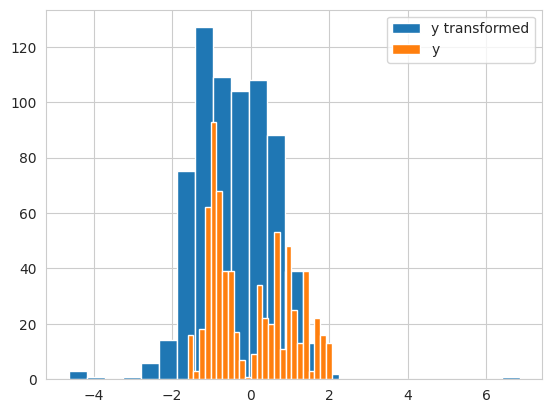

In [25]:
plt.hist(z, bins=25, label="y transformed")
plt.hist(load_data(data_path)['y_train'], bins=25, label="y")
plt.legend()

In [36]:
aa= dict(a=2, b=3,c=5)
aa
print(aa.pop('c', "test"))
aa

5


{'a': 2, 'b': 3}